# Solution to the Studycase
#### Author: Cosme Amaro Bautista
#### e-mail: cosme.amaro312@gmail.com

### Problem

In the day-ahead energy market, owners of thermal generators offer to sell energy according to an offer curve that specifies a price for different levels of generation. Since a thermal plant that is on-line must operate at a minimum level of output (or be turned off), part of the specification of the offer curve is the price per MW produced, when operating at the minimal sustained level of output. This is referred to as mingen-cost

The task is to determine the relationship between the  mingen-cost and the two variables fuel-cost (use data from Henry Hub natural gas spot price) and temperature (use provided csv), with the purpose of being able to predict the mingen-cost of this plant in the future.

Files

AEEC_ANTLP_2_mingencost_2023.csv

texas_monthly_average_temp.csv


## 1. Data Collection

In [1038]:
#Import the libraries used in the program.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [1039]:
#Read the data from the migen csv file.
mingen = pd.read_csv('AEEC_ANTLP_2_mingencost_2023.csv')
#Read the data from the monthly avg temperature csv file and drop the first four rows.
temp=pd.read_csv('texas_monthly_average_temp.csv',skiprows=4)
#Read the data from the monthly price of natural gas csv file.
price=pd.read_csv('Henry_Hub_ Natural_Gas_Spot_Price.csv')

In [1040]:
#Display the first rows of the dataframe.
mingen.head()

,resource_name,delivery_date,hour_ending,min_gen_cost
0,AEEC_ANTLP_2,2023-01-01 00:00:00,16,14.06
1,AEEC_ANTLP_2,2023-01-02 00:00:00,16,14.06
2,AEEC_ANTLP_2,2023-01-03 00:00:00,16,14.06
3,AEEC_ANTLP_2,2023-01-04 00:00:00,16,40.20
4,AEEC_ANTLP_2,2023-01-05 00:00:00,16,52.13


In [1041]:
temp.head()

,Date,Value,Anomaly
0,202201,45.8,-2.9
1,202202,45.8,-3.2
2,202203,57.0,-1.7
3,202204,68.8,2.1
4,202205,78.0,2.1


In [1042]:
price.head()

,Date,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
0,"Jan 07, 1997",3.82
1,"Jan 08, 1997",3.80
2,"Jan 09, 1997",3.61
3,"Jan 10, 1997",3.92
4,"Jan 13, 1997",4.00


## 2. Data Preprocessing

### Mingen Dataset

In [1043]:
#On the mingen dataframe, date is in the format of 'YYYY-MM-DD'.
mingen['delivery_date'] = pd.to_datetime(mingen['delivery_date'])
mingen.head(14)

,resource_name,delivery_date,hour_ending,min_gen_cost
0,AEEC_ANTLP_2,2023-01-01,16,14.06
1,AEEC_ANTLP_2,2023-01-02,16,14.06
2,AEEC_ANTLP_2,2023-01-03,16,14.06
3,AEEC_ANTLP_2,2023-01-04,16,40.20
4,AEEC_ANTLP_2,2023-01-05,16,52.13
5,AEEC_ANTLP_2,2023-01-06,16,52.67
6,AEEC_ANTLP_2,2023-01-07,16,26.48
7,AEEC_ANTLP_2,2023-01-08,16,26.48
8,AEEC_ANTLP_2,2023-01-09,16,26.45
9,AEEC_ANTLP_2,2023-01-10,16,NaN


In [1044]:
#Check for missing values in the mingen dataframe.
mingen.isnull().sum()

resource_name     0
delivery_date     0
hour_ending       0
min_gen_cost     51
dtype: int64

In [1045]:
#Get the min gen cost for each month.
mingen['month_year'] = mingen['delivery_date'].dt.to_period('M')

#Get the average min gen cost for each month.
avg_min_gen_cost = mingen.groupby('month_year')['min_gen_cost'].mean()

#Save the average min gen cost for each month to a dictionary.
avg_min_gen_cost_dict = avg_min_gen_cost.to_dict()

#Replace the missing values in the mingen dataframe with the average min gen cost for that month.
mingen['min_gen_cost'] = mingen['min_gen_cost'].fillna(mingen['month_year'].map(avg_min_gen_cost_dict))
mingen.head(10)


,resource_name,delivery_date,hour_ending,min_gen_cost,month_year
0,AEEC_ANTLP_2,2023-01-01,16,14.060000,2023-01
1,AEEC_ANTLP_2,2023-01-02,16,14.060000,2023-01
2,AEEC_ANTLP_2,2023-01-03,16,14.060000,2023-01
3,AEEC_ANTLP_2,2023-01-04,16,40.200000,2023-01
4,AEEC_ANTLP_2,2023-01-05,16,52.130000,2023-01
5,AEEC_ANTLP_2,2023-01-06,16,52.670000,2023-01
6,AEEC_ANTLP_2,2023-01-07,16,26.480000,2023-01
7,AEEC_ANTLP_2,2023-01-08,16,26.480000,2023-01
8,AEEC_ANTLP_2,2023-01-09,16,26.450000,2023-01
9,AEEC_ANTLP_2,2023-01-10,16,34.135556,2023-01


In [1046]:
#Check for missing values in the temp dataframe.
mingen.isnull().sum()

resource_name    0
delivery_date    0
hour_ending      0
min_gen_cost     0
month_year       0
dtype: int64

In [1047]:
#Get unique values in the resource_name column and count the number of unique values.
print(mingen['resource_name'].nunique())
print(mingen['hour_ending'].nunique())

1
1


In [1048]:
#Drop the usless columns in the temp dataframe.
mingen = mingen.drop(columns=['resource_name','hour_ending','month_year'])
mingen

,delivery_date,min_gen_cost
0,2023-01-01,14.06
1,2023-01-02,14.06
2,2023-01-03,14.06
3,2023-01-04,40.20
4,2023-01-05,52.13
...,...,...
361,2023-12-26,8.30
362,2023-12-28,34.07
363,2023-12-29,25.11
364,2023-12-30,25.40


In [1049]:
#Rename the delivery_date column to date.
mingen = mingen.rename(columns={'delivery_date':'Date'})
mingen.head()

,Date,min_gen_cost
0,2023-01-01,14.06
1,2023-01-02,14.06
2,2023-01-03,14.06
3,2023-01-04,40.20
4,2023-01-05,52.13


In [1050]:
mingen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          366 non-null    datetime64[ns]
 1   min_gen_cost  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


### Temp Dataset

In [1051]:
# Convert 'Date' to string and then to 'YYYY-MM' format
temp['Date'] = temp['Date'].astype(str).apply(lambda x: f"{x[:4]}-{x[4:6]}")
temp.head()

,Date,Value,Anomaly
0,2022-01,45.8,-2.9
1,2022-02,45.8,-3.2
2,2022-03,57.0,-1.7
3,2022-04,68.8,2.1
4,2022-05,78.0,2.1


In [1052]:
temp['Date'] = pd.to_datetime(temp['Date'], format='%Y-%m')
temp.head()

,Date,Value,Anomaly
0,2022-01-01,45.8,-2.9
1,2022-02-01,45.8,-3.2
2,2022-03-01,57.0,-1.7
3,2022-04-01,68.8,2.1
4,2022-05-01,78.0,2.1


In [1053]:
# Initialize an empty DataFrame for daily data
daily_temp_data = pd.DataFrame()

# Loop through each row in the monthly DataFrame
for index, row in temp.iterrows():
    # Create a date range for the month
    date_range = pd.date_range(start=row['Date'], end=row['Date'] + pd.offsets.MonthEnd(0))
    
    # Create a DataFrame with the daily dates and replicate the temperature
    daily_df = pd.DataFrame({'Date': date_range, 'Temperature': row['Value']})
    
    # Append to the daily data DataFrame
    daily_temp_data = pd.concat([daily_temp_data, daily_df], ignore_index=True)
    
daily_temp_data.head()

,Date,Temperature
0,2022-01-01,45.8
1,2022-01-02,45.8
2,2022-01-03,45.8
3,2022-01-04,45.8
4,2022-01-05,45.8


In [1054]:
#Check for missing values in the temp dataframe.
daily_temp_data.isnull().sum()

Date           0
Temperature    0
dtype: int64

In [1055]:
daily_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         851 non-null    datetime64[ns]
 1   Temperature  851 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


### Price Dataset

In [1056]:
#Convert 'Date' to date time and then to 'DD-MM-YYYY' format.
price['Date'] = pd.to_datetime(price['Date'])
#Change the large column names to shorter names.
price.columns = ['Date','Price']
price.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [1057]:
#Check for missing values in the price dataframe.
price.isnull().sum()

Date     1
Price    2
dtype: int64

In [1058]:
#Locate the missing values in date column of the price dataframe.
price[price['Date'].isnull()]
#Drop the last row of the price dataframe using index -1.
price.drop(price.index[-1],inplace=True)


In [1059]:
#Locate the missing values in the price dataframe.
price[price['Price'].isnull()]

,Date,Price
5284,2018-01-05,NaN


In [1060]:
#Calculate the mean of the price from January to December of the year 2018.
avg_price_2018 = price[(price['Date'] >= '02-01-2018') & (price['Date'] <= '31-12-2018')]['Price'].mean() 
# Replace the missing value with the mean of the price of the month.
price.loc[price['Price'].isnull(),'Price'] = avg_price_2018
#Check for missing values in the price dataframe.
price.isnull().sum()

Date     0
Price    0
dtype: int64

In [1061]:
price.shape

(6878, 2)

### Merge the datasets

In [1062]:
#Merge the mingen dataset with the daily_temp_data and price dataframes on the 'Date' column.
merged_data = pd.merge(mingen, daily_temp_data, on='Date', how='left')
df = pd.merge(merged_data, price, on='Date', how='left')

df.head()

,Date,min_gen_cost,Temperature,Price
0,2023-01-01,14.06,51.6,NaN
1,2023-01-02,14.06,51.6,NaN
2,2023-01-03,14.06,51.6,3.64
3,2023-01-04,40.20,51.6,3.75
4,2023-01-05,52.13,51.6,3.78


In [1063]:
#Check for missing values
df.isnull().sum()

Date              0
min_gen_cost      0
Temperature       0
Price           116
dtype: int64

In [1064]:
#Get the price of natural gas for each month.
df['month_year'] = df['Date'].dt.to_period('M')

#Get the average price of natural gas for each month.
avg_price = df.groupby('month_year')['Price'].mean()

#Save the average price of natural gas for each month to a dictionary.
avg_price_dict = avg_price.to_dict()

#Replace the missing values in the price column with the average price of natural gas for that month.
df['Price'] = df['Price'].fillna(df['month_year'].map(avg_price_dict))
df.head()

,Date,min_gen_cost,Temperature,Price,month_year
0,2023-01-01,14.06,51.6,3.273,2023-01
1,2023-01-02,14.06,51.6,3.273,2023-01
2,2023-01-03,14.06,51.6,3.640,2023-01
3,2023-01-04,40.20,51.6,3.750,2023-01
4,2023-01-05,52.13,51.6,3.780,2023-01


In [1065]:
df.isnull().sum()

Date            0
min_gen_cost    0
Temperature     0
Price           0
month_year      0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

In [1066]:
# Get general information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          366 non-null    datetime64[ns]
 1   min_gen_cost  366 non-null    float64       
 2   Temperature   366 non-null    float64       
 3   Price         366 non-null    float64       
 4   month_year    366 non-null    period[M]     
dtypes: datetime64[ns](1), float64(3), period[M](1)
memory usage: 14.4 KB


In [1067]:
# Summary statistics of the dataframe. Except for the 'Date' column, the rest of the columns are numerical.
df2=df.drop(columns=['Date','month_year'])
df2.describe()

,min_gen_cost,Temperature,Price
count,366.000000,366.000000,366.000000
mean,31.219968,68.155191,2.538166
std,7.603118,13.282652,0.366288
min,8.300000,51.600000,1.740000
25%,26.275556,56.500000,2.242500
50%,32.125000,68.400000,2.523000
75%,37.420000,82.075000,2.707619
max,56.000000,87.500000,3.780000


### Main Insights

* min_gen_cost:

The distribution of minimum generation costs shows a moderate spread with values ranging from 8.30 to 56.00.
The majority of the values (middle 50%) fall between 26.28 and 37.42, indicating that typical minimum generation costs are in this range.
The average minimum generation cost is slightly lower than the median, suggesting a slightly left-skewed distribution.

* Temperature:

The temperatures range from a low of 51.6°F to a high of 87.5°F, with an average around 68.16°F.
The middle 50% of temperatures are between 56.50°F and 82.08°F, indicating that most days have temperatures within this range.
The variability in temperatures is relatively high, as indicated by the standard deviation of 13.28°F.

* Price:

Prices range from 1.74 to 3.78, with a mean of 2.54.
The middle 50% of prices fall between 2.24 and 2.71, indicating that typical daily prices are within this range.
The prices exhibit relatively low variability, as shown by the standard deviation of 0.37.

### Summary
The minimum generation costs, temperatures, and prices show distinct patterns with varying levels of spread and central tendencies. The minimum generation costs and prices have relatively lower variability compared to temperatures, which exhibit a wider range of values. This information is useful for understanding the typical daily conditions and their fluctuations over the year.

###  Usefull graphs

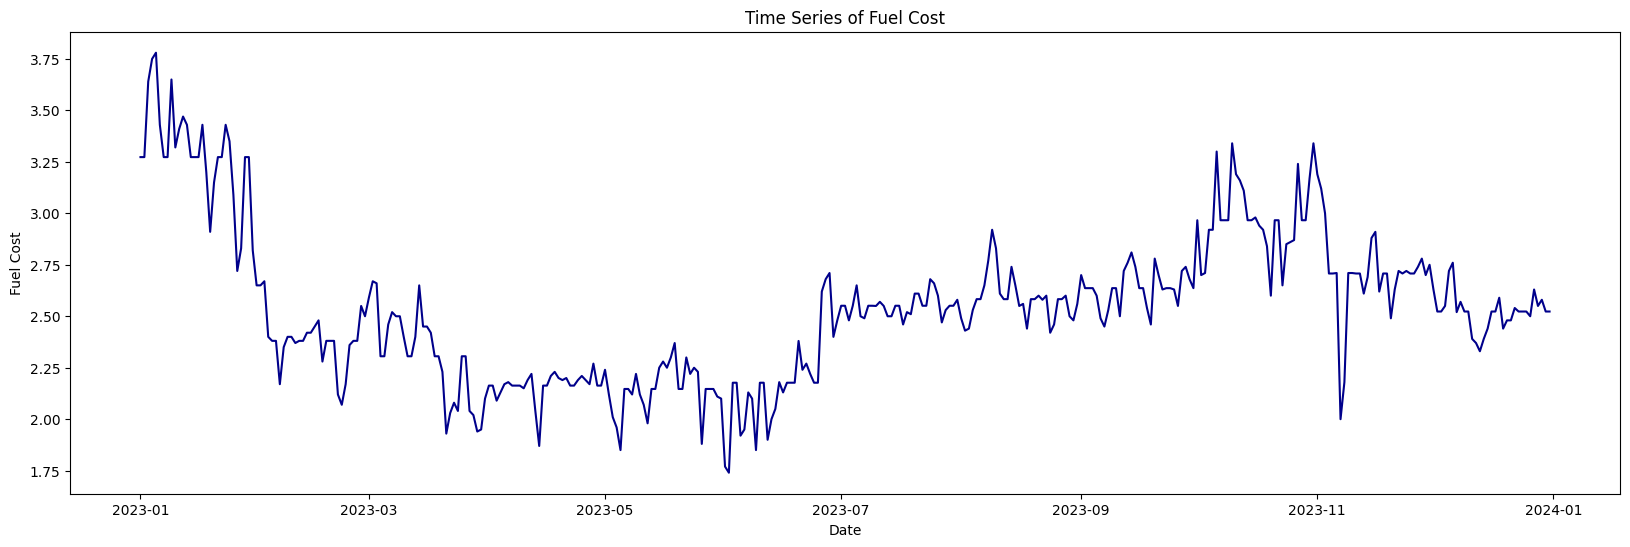

In [1068]:
#Plot time series for fuel-cost using seaborn.
plt.figure(figsize=(20, 6))
sns.lineplot(x='Date', y='Price', data=df,color='darkblue')
plt.title('Time Series of Fuel Cost')
plt.xlabel('Date')
plt.ylabel('Fuel Cost')
plt.show()

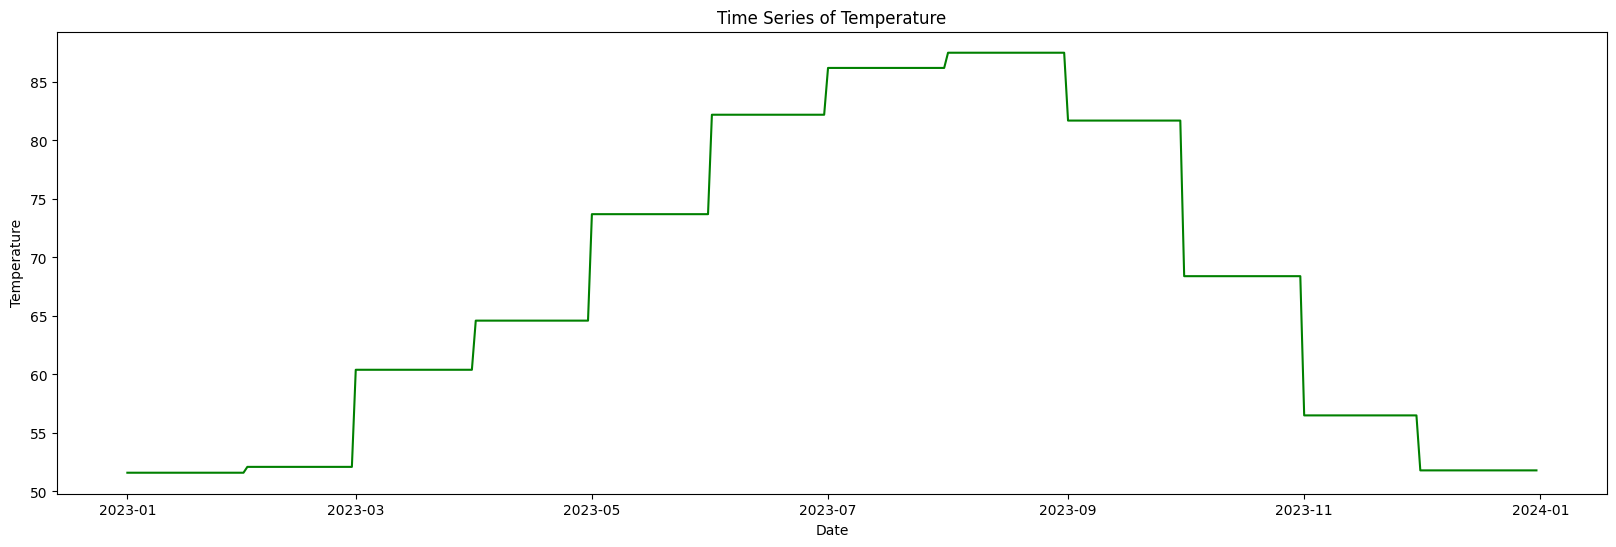

In [1069]:
#Plot time series for temperature using seaborn.
plt.figure(figsize=(20, 6))
sns.lineplot(x='Date', y='Temperature', data=df, color='green')
plt.title('Time Series of Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


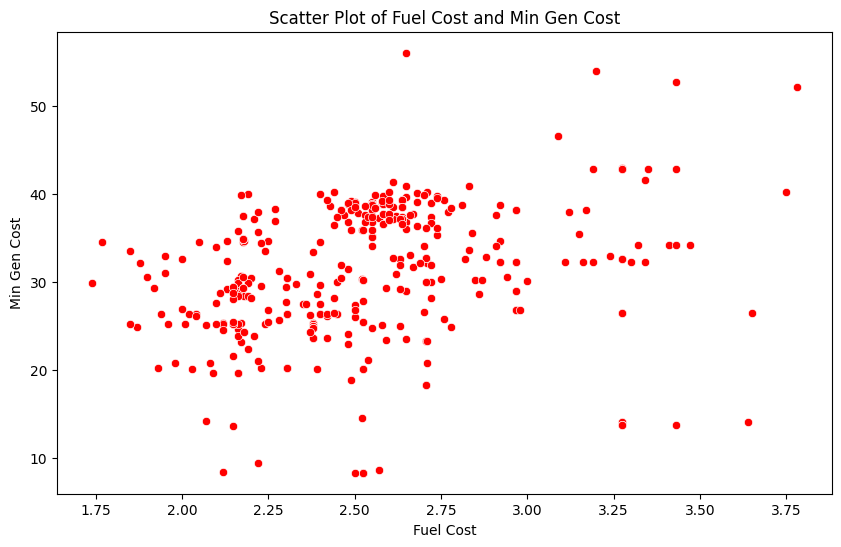

In [1070]:
#Scatter plots to examine relationships between mingen_cost, and fuel-cost.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='min_gen_cost', data=df, color='red')
plt.title('Scatter Plot of Fuel Cost and Min Gen Cost')
plt.xlabel('Fuel Cost')
plt.ylabel('Min Gen Cost')
plt.show()

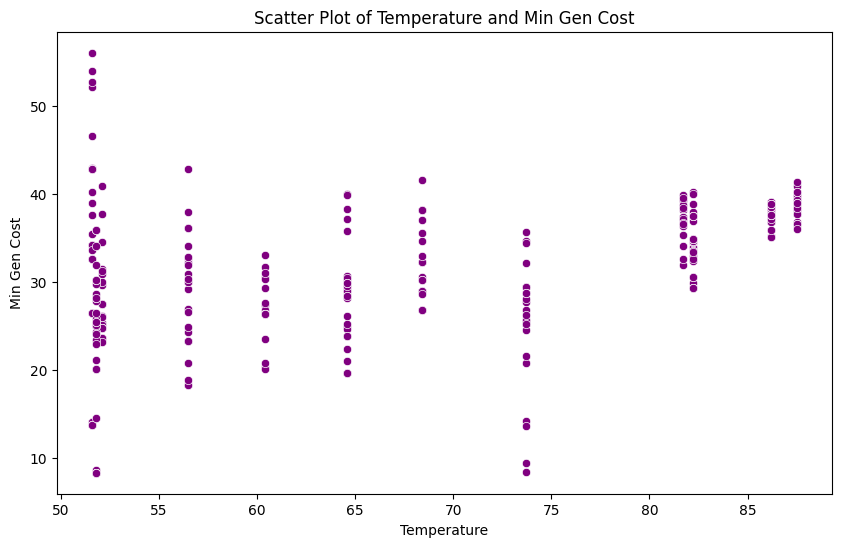

In [1071]:
#Scatter plots to examine relationships between mingen_cost and temperature.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='min_gen_cost', data=df, color='purple')
plt.title('Scatter Plot of Temperature and Min Gen Cost')
plt.xlabel('Temperature')
plt.ylabel('Min Gen Cost')
plt.show()


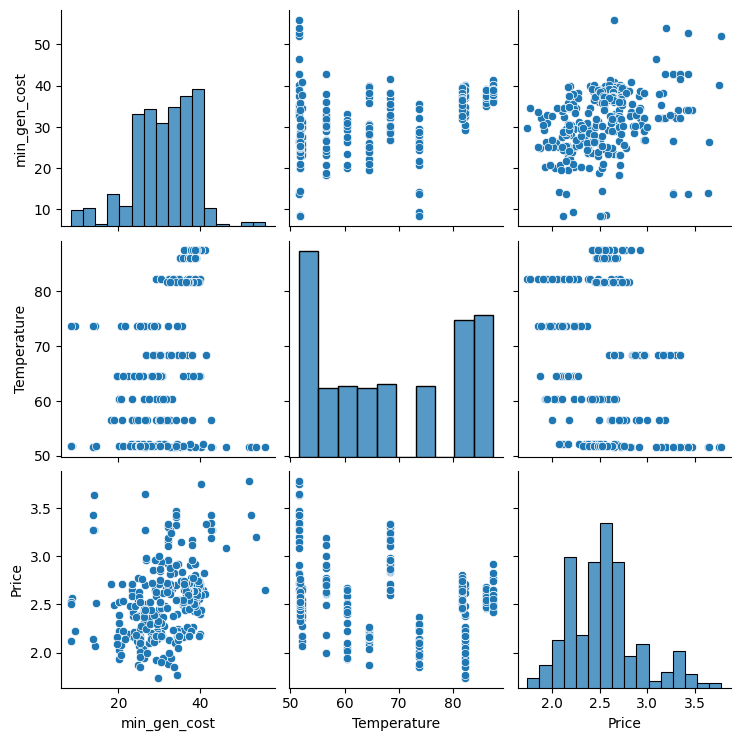

In [1072]:
# Plot pairwise relationship and distribution of these three variables
sns.pairplot(df[['min_gen_cost', 'Temperature','Price']]);

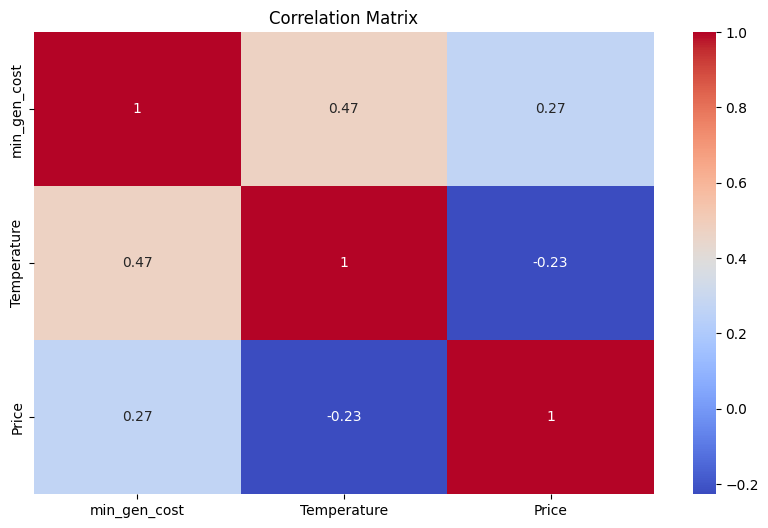

In [1073]:
#Correlation matrix to see how variables are correlated.
plt.figure(figsize=(10, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



### Graphic Insights

* The time series of fuel cost shows that the fuel cost is increasing over time.

* The time series of temperature shows that the temperature is fluctuating over time.

* The scatter plot of fuel cost and min gen cost shows that there is a positive correlation between fuel cost and min gen cost.

* The scatter plot of temperature and min gen cost shows that there is a negative correlation between temperature and min gen cost.

* The correlation matrix shows that there is a strong positive correlation between fuel cost and min gen cost.

* There is a weak negative correlation between temperature and min gen cost.

* There is a weak positive correlation between temperature and fuel cost.

* The data is ready for further analysis and modeling.

## 4. Feature Engineering

In [1074]:
# Lag Features: Created lag features for fuel-cost and temperature to account for any delayed effects on mingen-cost.
# Created lag features for fuel-cost
lag_days=[1,3,5,7]
for lag in lag_days:
    df2[f'Price_lag_{lag}'] = df2['Price'].shift(lag)
    
# Created lag features for temperature
for lag in lag_days:
    df2[f'Temperature_lag_{lag}'] = df2['Temperature'].shift(lag)
    
df2.head(10)


,min_gen_cost,Temperature,Price,Price_lag_1,Price_lag_3,Price_lag_5,Price_lag_7,Temperature_lag_1,Temperature_lag_3,Temperature_lag_5,Temperature_lag_7
0,14.060000,51.6,3.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.060000,51.6,3.273,3.273,NaN,NaN,NaN,51.6,NaN,NaN,NaN
2,14.060000,51.6,3.640,3.273,NaN,NaN,NaN,51.6,NaN,NaN,NaN
3,40.200000,51.6,3.750,3.640,3.273,NaN,NaN,51.6,51.6,NaN,NaN
4,52.130000,51.6,3.780,3.750,3.273,NaN,NaN,51.6,51.6,NaN,NaN
5,52.670000,51.6,3.430,3.780,3.640,3.273,NaN,51.6,51.6,51.6,NaN
6,26.480000,51.6,3.273,3.430,3.750,3.273,NaN,51.6,51.6,51.6,NaN
7,26.480000,51.6,3.273,3.273,3.780,3.640,3.273,51.6,51.6,51.6,51.6
8,26.450000,51.6,3.650,3.273,3.430,3.750,3.273,51.6,51.6,51.6,51.6
9,34.135556,51.6,3.320,3.650,3.273,3.780,3.640,51.6,51.6,51.6,51.6


In [1075]:
#Compute rolling averages for fuel-cost and temperature to smooth out short-term fluctuations.
# Created rolling average features for fuel-cost
rolling_days=[3,10,30]
for roll in rolling_days:
    df2[f'Price_roll_{roll}'] = df2['Price'].rolling(window=roll).mean()
    
# Created rolling average features for temperature
for roll in rolling_days:
    df2[f'Temperature_roll_{roll}'] = df2['Temperature'].rolling(window=roll).mean()
    
df2.head(10)

,min_gen_cost,Temperature,Price,Price_lag_1,Price_lag_3,Price_lag_5,Price_lag_7,Temperature_lag_1,Temperature_lag_3,Temperature_lag_5,Temperature_lag_7,Price_roll_3,Price_roll_10,Price_roll_30,Temperature_roll_3,Temperature_roll_10,Temperature_roll_30
0,14.060000,51.6,3.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.060000,51.6,3.273,3.273,NaN,NaN,NaN,51.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.060000,51.6,3.640,3.273,NaN,NaN,NaN,51.6,NaN,NaN,NaN,3.395333,NaN,NaN,51.6,NaN,NaN
3,40.200000,51.6,3.750,3.640,3.273,NaN,NaN,51.6,51.6,NaN,NaN,3.554333,NaN,NaN,51.6,NaN,NaN
4,52.130000,51.6,3.780,3.750,3.273,NaN,NaN,51.6,51.6,NaN,NaN,3.723333,NaN,NaN,51.6,NaN,NaN
5,52.670000,51.6,3.430,3.780,3.640,3.273,NaN,51.6,51.6,51.6,NaN,3.653333,NaN,NaN,51.6,NaN,NaN
6,26.480000,51.6,3.273,3.430,3.750,3.273,NaN,51.6,51.6,51.6,NaN,3.494333,NaN,NaN,51.6,NaN,NaN
7,26.480000,51.6,3.273,3.273,3.780,3.640,3.273,51.6,51.6,51.6,51.6,3.325333,NaN,NaN,51.6,NaN,NaN
8,26.450000,51.6,3.650,3.273,3.430,3.750,3.273,51.6,51.6,51.6,51.6,3.398667,NaN,NaN,51.6,NaN,NaN
9,34.135556,51.6,3.320,3.650,3.273,3.780,3.640,51.6,51.6,51.6,51.6,3.414333,3.4662,NaN,51.6,51.6,NaN


## 5. Machine Learning

In [1076]:
#Include the libraries used for machine learning operations.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, GroupKFold
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [1077]:
#Drop the rows with missing values.
df2= df2.dropna(inplace=False)

#Split the data into features and target variable.
X = df2.drop(columns='min_gen_cost')
y = df2['min_gen_cost']

#Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hyperparameter Tuning

In [1078]:
#initialize the random forest regressor model. Using GridSearch technique to find the best hyperparameters.
n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     rf = RandomForestRegressor(
                     n_estimators = n, 
                     criterion = 'absolute_error', 
                     max_features= f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rf.fit (X, y)    
            y_model = rf.predict(X)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(rf, X, y, cv=4, scoring = 'neg_mean_absolute_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l


print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)

Number of Estimators: 100
Max features: 4
Max Depth: 5
Min Split: 4
Min Leaf: 3


In [1079]:
#Initialize the linear regression model using GridSearch technique to find the best hyperparameters.
# Define the parameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X':[True,False]     
}
# Initialize the Grid Search with Linear Regression
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=4,
    n_jobs=-1
)
#Fit the Grid Search to the data
grid_search.fit(X, y)

# Extract the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}


In [1080]:
#Initialize the XGBoost regressor model with the best hyperparameters. Using GridSearch technique to find the best hyperparameters.
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.1, 0.2]
}
# Initialize the Grid Search with XGBoost
grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=4,
    n_jobs=-1
)
#Fit the Grid Search to the data
grid_search.fit(X, y)

# Extract the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}


### Fitting with the identified parameters

In [1081]:
# Fit a RF using best indentified parameters
rf = RandomForestRegressor(n_estimators=100, criterion = 'absolute_error', max_features=4, random_state = 33,
                           max_depth=5, min_samples_split=4, min_samples_leaf=3)
rf.fit(X, y);

In [1082]:
#Fit a Linear Regression model using the best identified parameters.
lr = LinearRegression(fit_intercept=True, positive=False, copy_X=True)
lr.fit(X, y);

In [1083]:
#Fit a XGBoost model using the best identified parameters.
xgb = XGBRegressor(n_estimators=50, max_depth=5, learning_rate=0.05, subsample=0.5, colsample_bytree=0.75, gamma=0)
xgb.fit(X, y);

### Predictions & Evaluation

In [1084]:
#Predict using Random Forest model.
y_pred_rf = rf.predict(X_test)

# Calculate the Mean Absolute Error of the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error: {:.3f}".format(mae_rf))

# Calculate the R^2 score of the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
print("R^2 Score: {:.3f}".format(r2_rf))

Mean Absolute Error: 2.227
R^2 Score: 0.751


In [1085]:
#Predict using Linear Regression model.
y_pred_lr = lr.predict(X_test)

# Calculate the Mean Absolute Error of the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error: {:.3f}".format(mae_lr))

# Calculate the R^2 score of the Linear Regression model
r2_lr = r2_score(y_test, y_pred_lr)
print("R^2 Score: {:.3f}".format(r2_lr))

Mean Absolute Error: 2.685
R^2 Score: 0.655


In [1086]:
# Predict the min_gen_cost using the XGBoost model
y_pred = xgb.predict(X_test)

# Calculate the Mean Absolute Error of the XGBoost model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.3f}".format(mae))

# Calculate the R^2 score of the XGBoost model
r2 = r2_score(y_test, y_pred)
print("R^2 Score: {:.3f}".format(r2))
#As XGBoost Regressor got the best score, we will use it to predict the min_gen_cost.

Mean Absolute Error: 1.953
R^2 Score: 0.853


In [1087]:
#Perform cross-validation on the XGBoost model.
cv_mae = cross_val_score(xgb, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = np.mean(-cv_mae)
print("Cross-Validation Mean Absolute Error: {:.3f}".format(cv_mae))
cv_r2 = cross_val_score(xgb, X, y, cv=5, scoring='r2')
cv_r2 = np.mean(-cv_r2)
print("Cross-Validation R^2 Score: {:.3f}".format(cv_r2))

Cross-Validation Mean Absolute Error: 4.790
Cross-Validation R^2 Score: 0.586


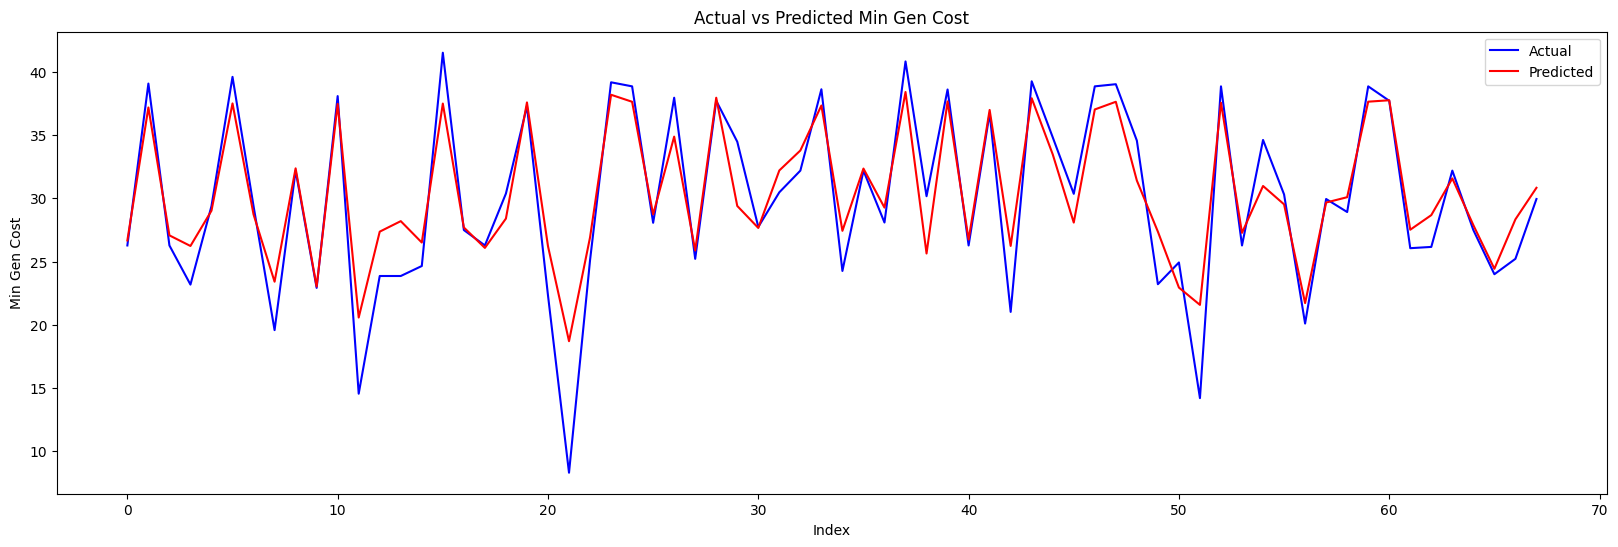

In [1088]:
#Plot the actual and predicted values of min_gen_cost.
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Min Gen Cost')
plt.xlabel('Index')
plt.ylabel('Min Gen Cost')
plt.legend()
plt.show()


### Feature Importance

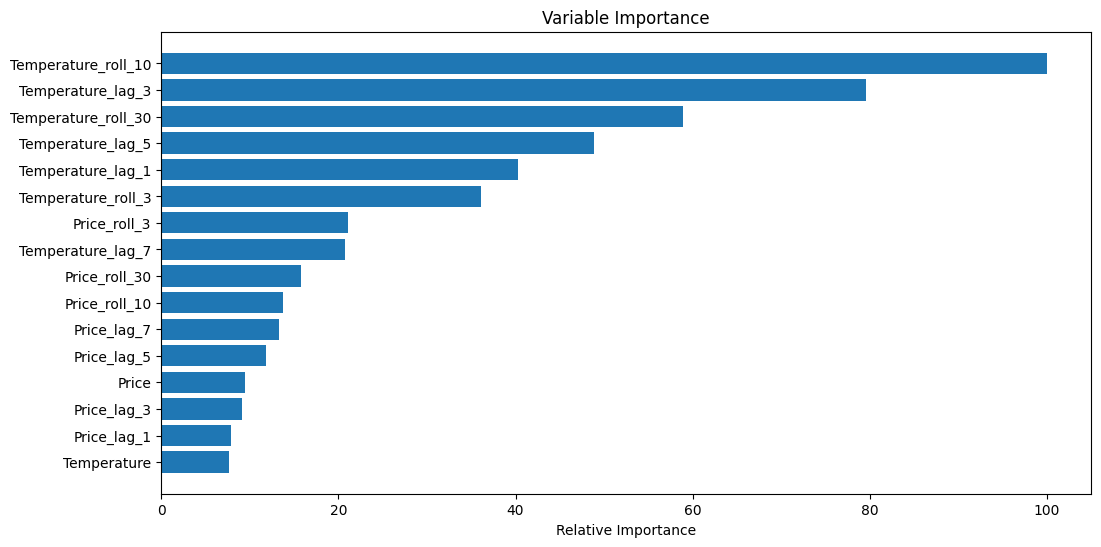

In [1089]:
#Display the feature importance of the XGBoost model.
feature_importance = xgb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


## Results

In [1090]:
#New data with the actual and predicted values of min_gen_cost and the date of the original dataframe.
new_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
new_data.head(10)

#Save the new data to a csv file.
#new_data.to_csv('new_data.csv', index=False)

,Actual,Predicted
75,26.275556,26.672646
192,39.080000,37.188026
86,26.275556,27.072531
54,23.180000,26.234674
142,29.390000,29.026131
227,39.610000,37.510620
137,29.390000,28.728285
92,19.580000,23.409124
278,32.194737,32.376053
355,22.920000,23.024261
